# Logistic Regression from Scratch

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import expit
from scipy.optimize import fmin
import pandas as pd

In [2]:
class LogisticRegression(object):
    def __init__(self, alpha=0.01, maxiters=5000, weights=None):
        self.alpha = alpha
        self.maxiters = maxiters
        self.weights = weights
        self.m = None
        self.predictions = np.array([])
        
    def sigmoid(self, z):
        return expit(z)
    
    #Cost Function
    def cost_function(self, weights, x, y):
        self.m = len(y)
        y = y.reshape((-1,1))
        self.weights = weights
        term1 = -np.dot(y.T, np.log(self.sigmoid(np.dot(x, self.weights))))
        term2 = -np.dot((1-y).T, np.log(self.sigmoid(1 - np.dot(x, self.weights))))
        cost = np.sum(term1 + term2) / self.m
        return cost
    
    """
    Instead of using Gradient Descent I used scipy.optimize module's fmin method
    to minize the cost function. It is easy to use and computes very fast.
    
    """
    def optimize_weights(self, weights, x, y):
        result = fmin(func=self.cost_function, x0=weights, args=(x, y), maxiter=self.maxiters, full_output=True)
        self.weights = result[0]
        return result[0], result[1]
    
    def predict(self, x): # Predicts the labels
        return self.sigmoid(np.dot(x, self.weights[0]))
    
    def fit(self, x, y): #Trains the Model
        self.x = x
        self.y = y
        self.weights = np.random.random((x.shape[1], 1))
        self.weights = self.optimize_weights(self.weights, x, y)
    
    """
    Visualizing the data. This code cannot visualize model with more than
    2 features. It is difficult to visualize higher dimensional models in 
    matplotlib
    
    """ 
    def visualize(self):
        if self.x.shape[-1]-1 > 2:
            print('Cannot Visualize data with more than 2 features :(')
            return None
        
        x11 = self.x[y==0][:, 1]
        x12 = self.x[y==1][:, 1]
        y11 = self.x[y==0][:, 2]
        y12 = self.x[y==1][:, 2]
        wt = self.weights[0].ravel()
        lpx = np.array([min(self.x[:, 1]), max(self.x[:, 1])])
        lpy = -(wt[1]*lpx + wt[0]) / wt[2]
        plt.scatter(x11, y11, c='green', s=50, alpha=.5, label='Yes')
        plt.scatter(x12, y12, c='red', s=50, alpha=.5, label='No')
        plt.plot(lpx, lpy, color='k', label='Predictions')
        plt.xlabel('X-1')
        plt.ylabel('X-2')
        plt.legend()
        plt.grid(True)

In [3]:
data = pd.read_csv('ex2data1.txt', header=None)

In [4]:
x = data.iloc[:, [0, 1]].values
y = data.iloc[:, -1].values
x = np.insert(x, 0, 1, axis=1)

In [5]:
clf = LogisticRegression(maxiters=4000)

In [6]:
clf.fit(x, y)

Optimization terminated successfully.
         Current function value: 0.145225
         Iterations: 150
         Function evaluations: 276


In [7]:
ypred=np.where(clf.predict(x)>=0.5, 1, 0)

In [8]:
ypred

array([0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1])

In [9]:
y

array([0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [10]:
clf.weights

(array([-21.56147891,   0.17976874,   0.17697822]), 0.14522460200660842)

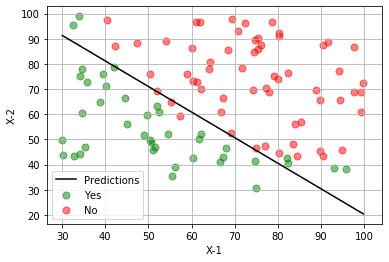

In [12]:
clf.visualize()
# Above Prediction line is No region
#Below Prediction line is Yes region